In [1]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
import emoji
import demoji

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def Evaluate(y_test,y_pred):
    

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [3]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        tweet = demoji.replace_with_desc(tweet,sep='*')
   
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [4]:
def load_models():

    # Load the vectoriser.
    file = open('vectoriser-ngram.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    #df = df.replace([0,1], ["Negative","Positive"])
    return df


In [5]:
vectoriser,LRmodel = load_models()

In [6]:
df = pd.read_csv('final_dataset.csv')

In [7]:
df

Unnamed: 0               user  \
0           1663    Saurabh Jaiswal   
1           1662      Raja Abdullah   
2           1661               Ayra   
3           1660     Olivier Miss 😷   
4           1659      Quéen Piath🇸🇸   
...          ...                ...   
5329        1668            GMRcris   
5330        1667  Brendon Hullinger   
5331        1666            uxgod    
5332        1665              aloon   
5333        1664                 アプ   

                                                  tweet                 time  \
0     The OLED screen on the iPhone 12 Pro is just g...  2020-11-01 08:10:00   
1     IPhone 12 unboxing. \nhttps://t.co/AU4wKI5XPp\...  2020-11-01 08:10:27   
2     @kimskalat giveaway collab pero may iphone12 n...  2020-11-01 08:12:29   
3     iPhone 12 review: Apple's best since the iPhon...  2020-11-01 08:13:20   
4     Did #Apple run out of phone ideas or sum😹😹 #iP...  2020-11-01 08:18:08   
...                                                 ...                  ...   
5329  The new iPhone 12 Pro Max in the new blue colo...  2020-11-14 06:09:16   
5330  @AppleNews @tim_cook #iPhone12 #iphone #apple ...  2020-11-14 06:09:43   
5331  Pacific Blue special edition #iPhone12 wallpap...  2020-11-14 06:10:19   
5332  the new iPhone 12 might just spark joy for a c...  2020-11-14 06:17:39   
5333                                @MeroQuma iPhone12？  2020-11-14 06:17:42   

       keyword  
0     Iphone12  
1     Iphone12  
2     Iphone12  
3     Iphone12  
4     Iphone12  
...        ...  
5329  Iphone12  
5330  Iphone12  
5331  Iphone12  
5332  Iphone12  
5333  Iphone12  

[5334 rows x 5 columns]

In [8]:
text = list(df.tweet)
text = preprocess(text)
data = vectoriser.transform(text)
sentiment = LRmodel.predict(data)
prob = LRmodel.predict_proba(data)

In [9]:
sentiment

array([1, 1, 1, ..., 1, 0, 1])

In [10]:
prob

array([[0.44062589, 0.55937411],
       [0.28489142, 0.71510858],
       [0.12650939, 0.87349061],
       ...,
       [0.06700482, 0.93299518],
       [0.56451061, 0.43548939],
       [0.42058733, 0.57941267]])

In [11]:
prob = list(prob)

In [12]:
prob_1 = []
for i in prob:
    prob_1.append(i[1])

In [13]:
df['sentiment'] , df['prob'] = sentiment , prob_1


In [14]:
df

Unnamed: 0               user  \
0           1663    Saurabh Jaiswal   
1           1662      Raja Abdullah   
2           1661               Ayra   
3           1660     Olivier Miss 😷   
4           1659      Quéen Piath🇸🇸   
...          ...                ...   
5329        1668            GMRcris   
5330        1667  Brendon Hullinger   
5331        1666            uxgod    
5332        1665              aloon   
5333        1664                 アプ   

                                                  tweet                 time  \
0     The OLED screen on the iPhone 12 Pro is just g...  2020-11-01 08:10:00   
1     IPhone 12 unboxing. \nhttps://t.co/AU4wKI5XPp\...  2020-11-01 08:10:27   
2     @kimskalat giveaway collab pero may iphone12 n...  2020-11-01 08:12:29   
3     iPhone 12 review: Apple's best since the iPhon...  2020-11-01 08:13:20   
4     Did #Apple run out of phone ideas or sum😹😹 #iP...  2020-11-01 08:18:08   
...                                                 ...                  ...   
5329  The new iPhone 12 Pro Max in the new blue colo...  2020-11-14 06:09:16   
5330  @AppleNews @tim_cook #iPhone12 #iphone #apple ...  2020-11-14 06:09:43   
5331  Pacific Blue special edition #iPhone12 wallpap...  2020-11-14 06:10:19   
5332  the new iPhone 12 might just spark joy for a c...  2020-11-14 06:17:39   
5333                                @MeroQuma iPhone12？  2020-11-14 06:17:42   

       keyword  sentiment      prob  
0     Iphone12          1  0.559374  
1     Iphone12          1  0.715109  
2     Iphone12          1  0.873491  
3     Iphone12          1  0.516059  
4     Iphone12          0  0.219712  
...        ...        ...       ...  
5329  Iphone12          1  0.656068  
5330  Iphone12          1  0.830734  
5331  Iphone12          1  0.932995  
5332  Iphone12          0  0.435489  
5333  Iphone12          1  0.579413  

[5334 rows x 7 columns]

In [15]:
df1 = df[0:500]
df1.to_csv('labelled.csv')

In [16]:
df_pos = df[df['sentiment']==1]

In [17]:
df_pos

Unnamed: 0                     user  \
0           1663          Saurabh Jaiswal   
1           1662            Raja Abdullah   
2           1661                     Ayra   
3           1660           Olivier Miss 😷   
5           1658  Nsawam Michael Scofield   
...          ...                      ...   
5328        1669                ∠REUNIPON   
5329        1668                  GMRcris   
5330        1667        Brendon Hullinger   
5331        1666                  uxgod    
5333        1664                       アプ   

                                                  tweet                 time  \
0     The OLED screen on the iPhone 12 Pro is just g...  2020-11-01 08:10:00   
1     IPhone 12 unboxing. \nhttps://t.co/AU4wKI5XPp\...  2020-11-01 08:10:27   
2     @kimskalat giveaway collab pero may iphone12 n...  2020-11-01 08:12:29   
3     iPhone 12 review: Apple's best since the iPhon...  2020-11-01 08:13:20   
5     Brothers and sisters, the kingdom of God is wh...  2020-11-01 08:21:01   
...                                                 ...                  ...   
5328                             @kimidorinya iPhone12？  2020-11-14 06:07:23   
5329  The new iPhone 12 Pro Max in the new blue colo...  2020-11-14 06:09:16   
5330  @AppleNews @tim_cook #iPhone12 #iphone #apple ...  2020-11-14 06:09:43   
5331  Pacific Blue special edition #iPhone12 wallpap...  2020-11-14 06:10:19   
5333                                @MeroQuma iPhone12？  2020-11-14 06:17:42   

       keyword  sentiment      prob  
0     Iphone12          1  0.559374  
1     Iphone12          1  0.715109  
2     Iphone12          1  0.873491  
3     Iphone12          1  0.516059  
5     Iphone12          1  0.881154  
...        ...        ...       ...  
5328  Iphone12          1  0.579413  
5329  Iphone12          1  0.656068  
5330  Iphone12          1  0.830734  
5331  Iphone12          1  0.932995  
5333  Iphone12          1  0.579413  

[3670 rows x 7 columns]

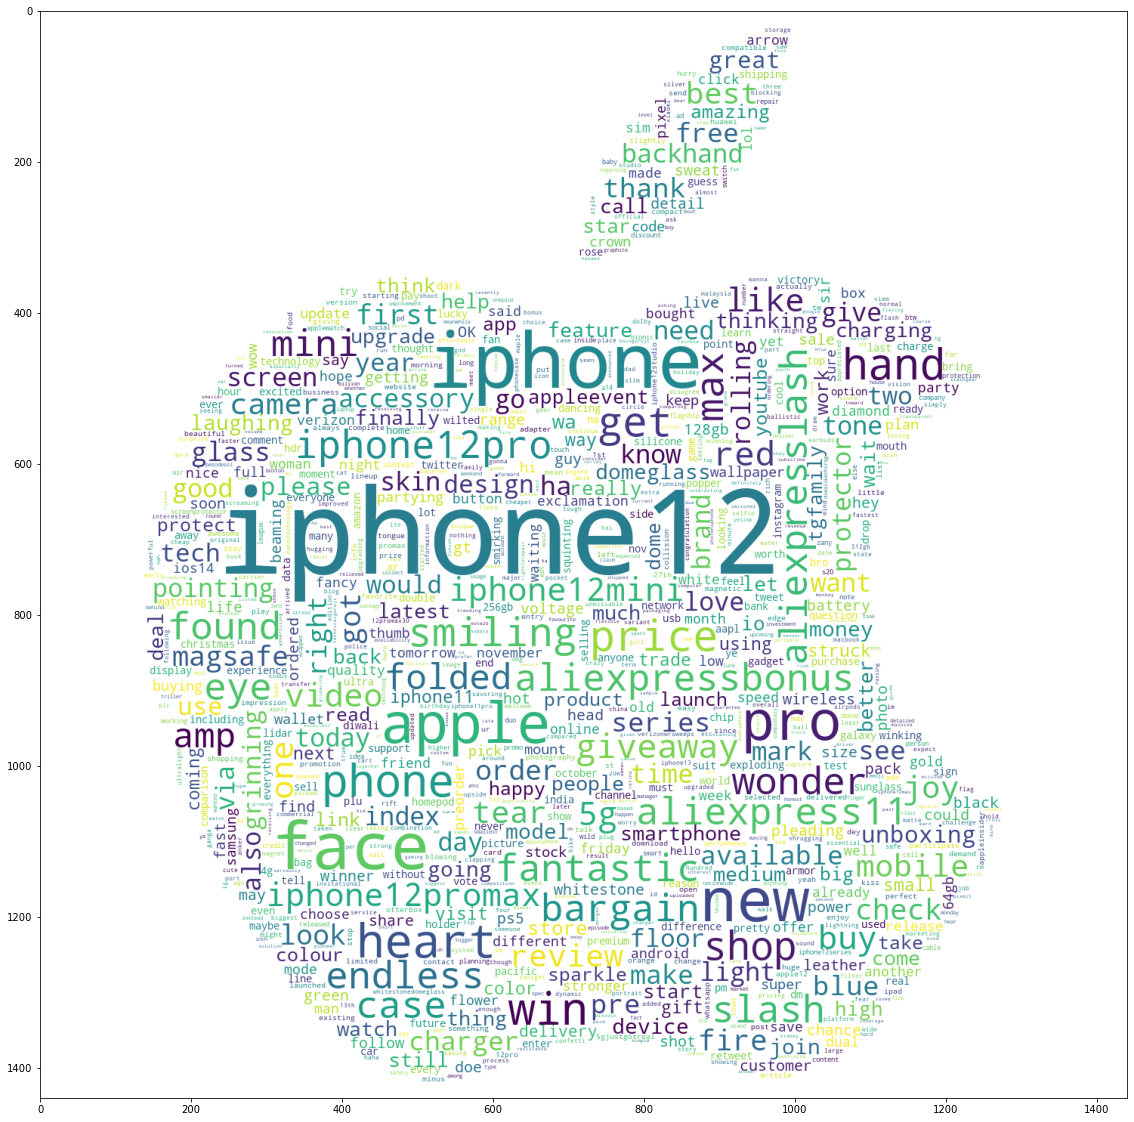

In [18]:
import PIL.Image as image
data = list(preprocess(df_pos.tweet))
stopword = stopwords.words("english")+['URL','USER']
mask = np.array(image.open("apple.png"))
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               stopwords=stopword,
               mask=mask,
               background_color='#FFFFFF',
               
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
wc.to_file("pos_wordcloud.jpg")

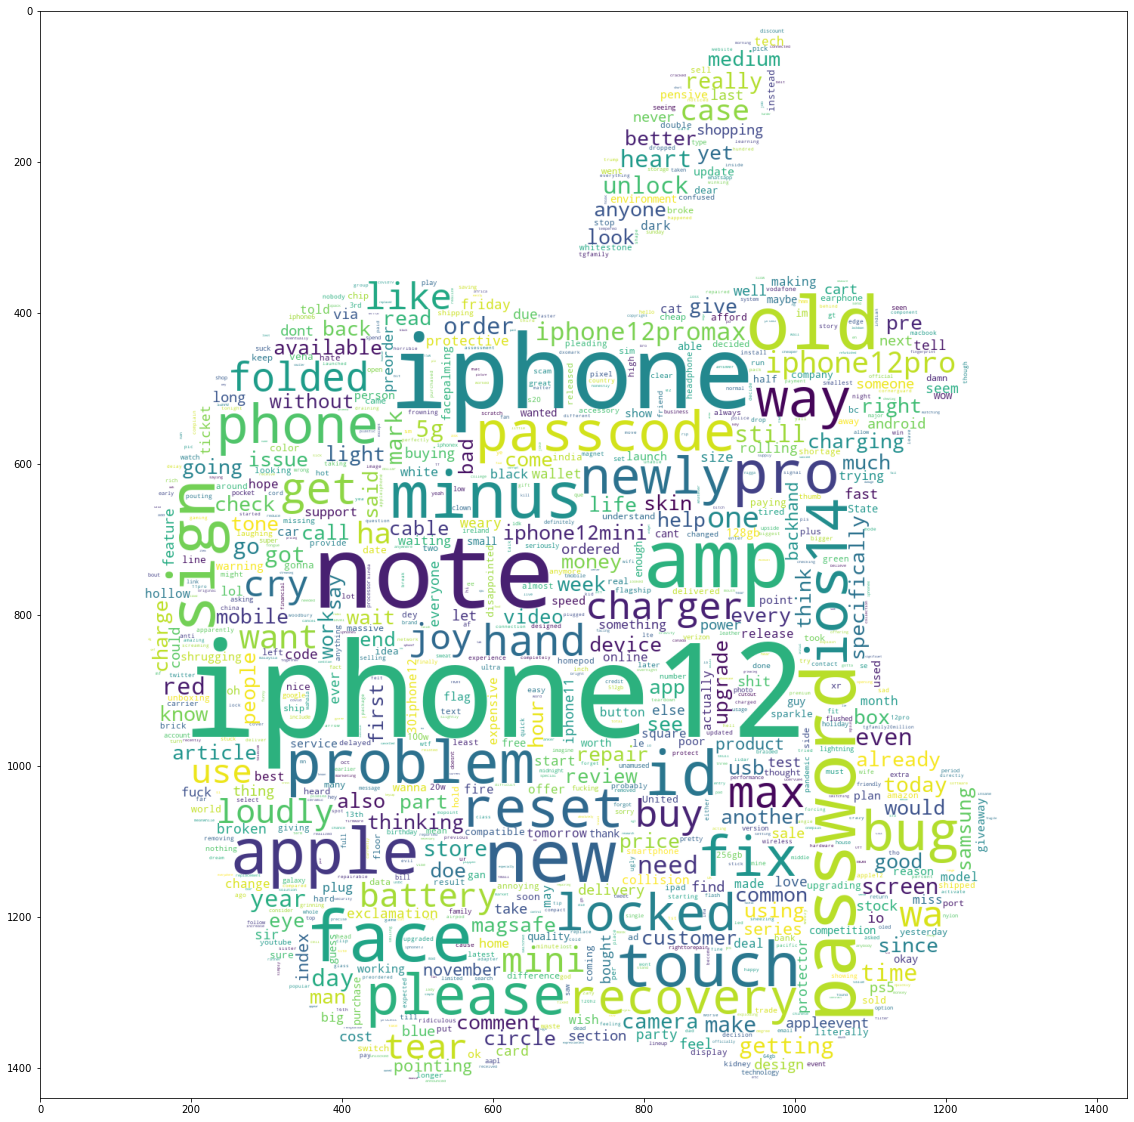

In [19]:
df_neg = df[df['sentiment']==0]
data = list(preprocess(df_neg.tweet))
stopword = stopwords.words("english")+['URL','USER']
mask = np.array(image.open("apple.png"))
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               stopwords=stopword,
               mask=mask,
               background_color='#FFFFFF',
               
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
wc.to_file("neg_wordcloud.jpg")

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

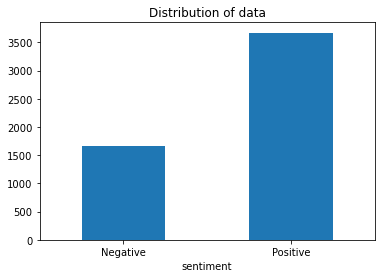

In [20]:
# Removing the unnecessary columns.
df1 = df[['sentiment','tweet']]

# Plotting the distribution for dataset.
ax = df1.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)


In [21]:
ct = pd.value_counts(df1['sentiment'])

In [22]:
a = ct[1]

In [23]:
a = ct[1] / (ct[1]+ct[0])
b = ct[0] / (ct[1]+ct[0])

In [24]:
a

0.6880389951256093

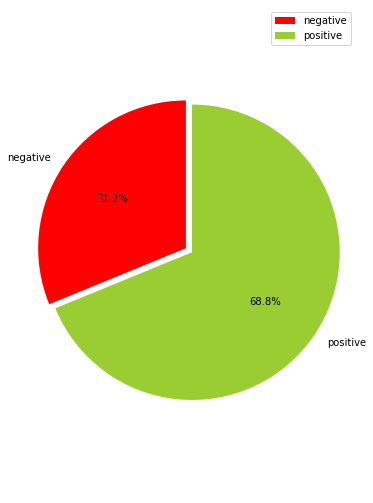

In [25]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(6,9))



labels = ['negative','positive']

sizes = [b,a]
colors = ['red','yellowgreen']

explode = (0,0.05)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)


for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)

plt.axis('equal')
plt.legend()
plt.savefig('emotional_distribution.jpg')
plt.show()

In [26]:
#Time change of emotional score
#take prob as the emotional score
df.time = pd.to_datetime(df.time)
df['day'] = df['time'].dt.day

In [27]:
df

Unnamed: 0               user  \
0           1663    Saurabh Jaiswal   
1           1662      Raja Abdullah   
2           1661               Ayra   
3           1660     Olivier Miss 😷   
4           1659      Quéen Piath🇸🇸   
...          ...                ...   
5329        1668            GMRcris   
5330        1667  Brendon Hullinger   
5331        1666            uxgod    
5332        1665              aloon   
5333        1664                 アプ   

                                                  tweet                time  \
0     The OLED screen on the iPhone 12 Pro is just g... 2020-11-01 08:10:00   
1     IPhone 12 unboxing. \nhttps://t.co/AU4wKI5XPp\... 2020-11-01 08:10:27   
2     @kimskalat giveaway collab pero may iphone12 n... 2020-11-01 08:12:29   
3     iPhone 12 review: Apple's best since the iPhon... 2020-11-01 08:13:20   
4     Did #Apple run out of phone ideas or sum😹😹 #iP... 2020-11-01 08:18:08   
...                                                 ...                 ...   
5329  The new iPhone 12 Pro Max in the new blue colo... 2020-11-14 06:09:16   
5330  @AppleNews @tim_cook #iPhone12 #iphone #apple ... 2020-11-14 06:09:43   
5331  Pacific Blue special edition #iPhone12 wallpap... 2020-11-14 06:10:19   
5332  the new iPhone 12 might just spark joy for a c... 2020-11-14 06:17:39   
5333                                @MeroQuma iPhone12？ 2020-11-14 06:17:42   

       keyword  sentiment      prob  day  
0     Iphone12          1  0.559374    1  
1     Iphone12          1  0.715109    1  
2     Iphone12          1  0.873491    1  
3     Iphone12          1  0.516059    1  
4     Iphone12          0  0.219712    1  
...        ...        ...       ...  ...  
5329  Iphone12          1  0.656068   14  
5330  Iphone12          1  0.830734   14  
5331  Iphone12          1  0.932995   14  
5332  Iphone12          0  0.435489   14  
5333  Iphone12          1  0.579413   14  

[5334 rows x 8 columns]

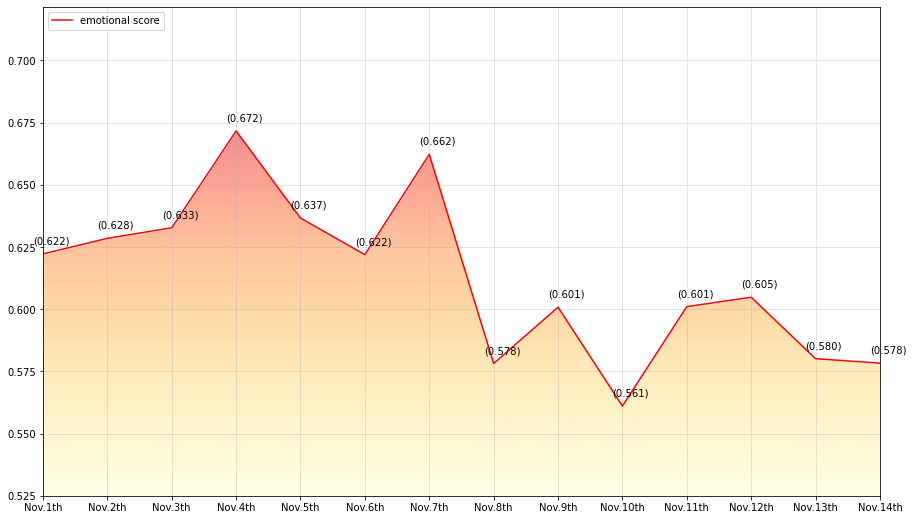

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

fig, ax = plt.subplots(figsize=(15,9))     
plt.grid(alpha=0.4)

x = df.groupby('day')['prob'].sum().index

y = df.groupby('day')['prob'].mean()

_, yv = np.meshgrid(np.linspace(0,10,1500), np.linspace(0,1,900))

ax.fill_between(x, y, max(y)+0.05, color='white')
extent = [x[0], x[-1], 0.525, max(y)+0.05]
ax.imshow(yv, cmap=mpl.cm.YlOrRd, origin='lower',alpha = 0.5, aspect = 'auto',
          extent = extent)


x_ticks_label = ["Nov.{}th".format(i) for i in x]

plt.xticks(x,x_ticks_label)

plt.plot(x,y,label="emotional score",color = 'red')


for a,b in zip(x,y):
     plt.annotate('(%.3f)'%(b),xy=(a,b),xytext=(-10,10),textcoords='offset points')



plt.legend(loc="upper left")

plt.savefig('emotional score')
plt.show()


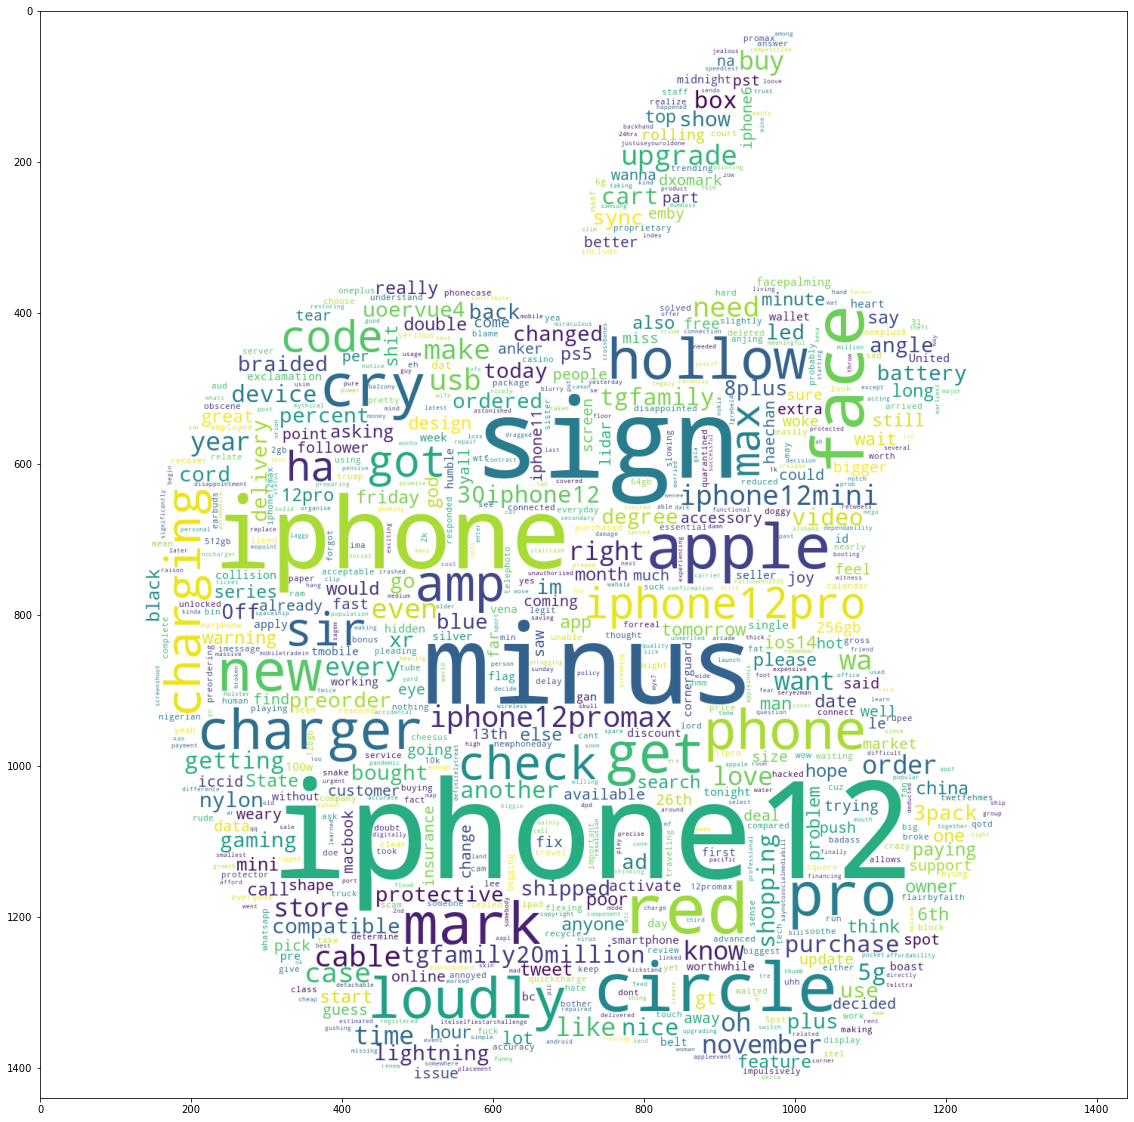

In [29]:
df_neg = df[df['sentiment']==0]
df_neg12 = df_neg[df_neg['day']==12]
data = list(preprocess(df_neg12.tweet))
stopword = stopwords.words("english")+['URL','USER']
mask = np.array(image.open("apple.png"))
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               stopwords=stopword,
               mask=mask,
               background_color='#FFFFFF',
               
               collocations=False).generate(" ".join(data))
plt.imshow(wc)


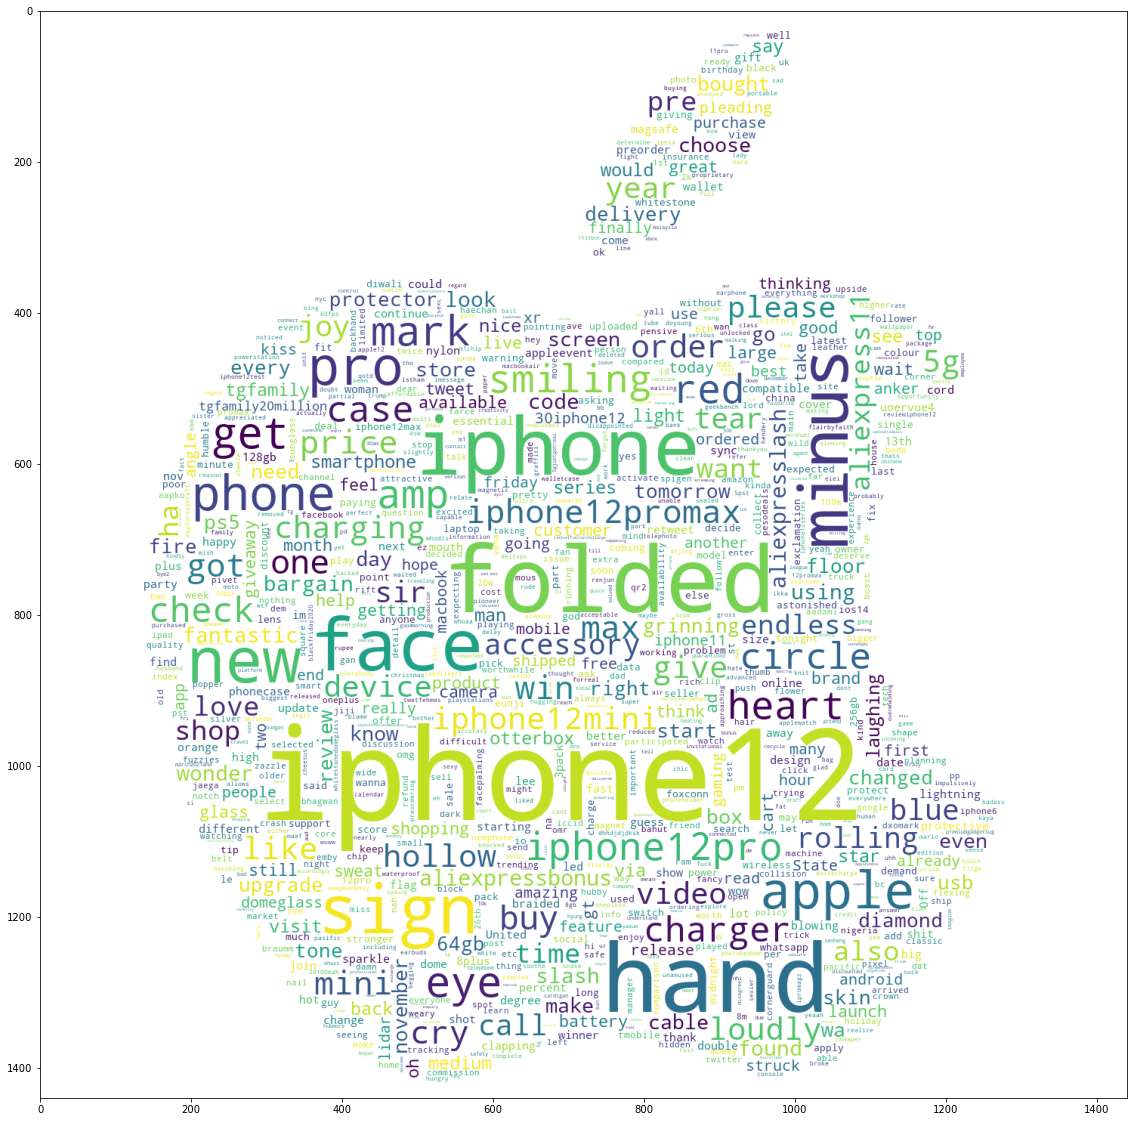

In [30]:
df12 = df[df['day']==12]
data = list(preprocess(df12.tweet))
stopword = stopwords.words("english")+['URL','USER']
mask = np.array(image.open("apple.png"))
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               stopwords=stopword,
               mask=mask,
               background_color='#FFFFFF',
               
               collocations=False).generate(" ".join(data))
plt.imshow(wc)


In [31]:
import pyecharts.options as opts
from pyecharts.charts import Gauge

In [32]:
Gaug_1=(
    Gauge(init_opts=opts.InitOpts(width="800px", height="400px"))
    .add(series_name="sentiment socre", data_pair=[["",  round(df.prob.mean()*100,2)]],
        radius='70%',   
         #设置仪表盘颜色
         axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[(0.4, "#3CB371"), (0.6, "#FFD700"),(1,"#fd666d" )], width=30)))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="sentiment socre",pos_left="center"),
        legend_opts=opts.LegendOpts(is_show=False),
        tooltip_opts=opts.TooltipOpts(is_show=True, formatter="{a} <br/>{b} : {c}%"),
    )
    .render("gauge.html")
)

In [33]:
df.prob.mean()

0.6125988941772521

In [34]:
df

Unnamed: 0               user  \
0           1663    Saurabh Jaiswal   
1           1662      Raja Abdullah   
2           1661               Ayra   
3           1660     Olivier Miss 😷   
4           1659      Quéen Piath🇸🇸   
...          ...                ...   
5329        1668            GMRcris   
5330        1667  Brendon Hullinger   
5331        1666            uxgod    
5332        1665              aloon   
5333        1664                 アプ   

                                                  tweet                time  \
0     The OLED screen on the iPhone 12 Pro is just g... 2020-11-01 08:10:00   
1     IPhone 12 unboxing. \nhttps://t.co/AU4wKI5XPp\... 2020-11-01 08:10:27   
2     @kimskalat giveaway collab pero may iphone12 n... 2020-11-01 08:12:29   
3     iPhone 12 review: Apple's best since the iPhon... 2020-11-01 08:13:20   
4     Did #Apple run out of phone ideas or sum😹😹 #iP... 2020-11-01 08:18:08   
...                                                 ...                 ...   
5329  The new iPhone 12 Pro Max in the new blue colo... 2020-11-14 06:09:16   
5330  @AppleNews @tim_cook #iPhone12 #iphone #apple ... 2020-11-14 06:09:43   
5331  Pacific Blue special edition #iPhone12 wallpap... 2020-11-14 06:10:19   
5332  the new iPhone 12 might just spark joy for a c... 2020-11-14 06:17:39   
5333                                @MeroQuma iPhone12？ 2020-11-14 06:17:42   

       keyword  sentiment      prob  day  
0     Iphone12          1  0.559374    1  
1     Iphone12          1  0.715109    1  
2     Iphone12          1  0.873491    1  
3     Iphone12          1  0.516059    1  
4     Iphone12          0  0.219712    1  
...        ...        ...       ...  ...  
5329  Iphone12          1  0.656068   14  
5330  Iphone12          1  0.830734   14  
5331  Iphone12          1  0.932995   14  
5332  Iphone12          0  0.435489   14  
5333  Iphone12          1  0.579413   14  

[5334 rows x 8 columns]

In [35]:
df = df[['user','tweet','time','sentiment','prob']]

In [36]:
df.to_csv('labelled dataset.csv')

In [37]:
df

user                                              tweet  \
0       Saurabh Jaiswal  The OLED screen on the iPhone 12 Pro is just g...   
1         Raja Abdullah  IPhone 12 unboxing. \nhttps://t.co/AU4wKI5XPp\...   
2                  Ayra  @kimskalat giveaway collab pero may iphone12 n...   
3        Olivier Miss 😷  iPhone 12 review: Apple's best since the iPhon...   
4         Quéen Piath🇸🇸  Did #Apple run out of phone ideas or sum😹😹 #iP...   
...                 ...                                                ...   
5329            GMRcris  The new iPhone 12 Pro Max in the new blue colo...   
5330  Brendon Hullinger  @AppleNews @tim_cook #iPhone12 #iphone #apple ...   
5331            uxgod   Pacific Blue special edition #iPhone12 wallpap...   
5332              aloon  the new iPhone 12 might just spark joy for a c...   
5333                 アプ                                @MeroQuma iPhone12？   

                    time  sentiment      prob  
0    2020-11-01 08:10:00          1  0.559374  
1    2020-11-01 08:10:27          1  0.715109  
2    2020-11-01 08:12:29          1  0.873491  
3    2020-11-01 08:13:20          1  0.516059  
4    2020-11-01 08:18:08          0  0.219712  
...                  ...        ...       ...  
5329 2020-11-14 06:09:16          1  0.656068  
5330 2020-11-14 06:09:43          1  0.830734  
5331 2020-11-14 06:10:19          1  0.932995  
5332 2020-11-14 06:17:39          0  0.435489  
5333 2020-11-14 06:17:42          1  0.579413  

[5334 rows x 5 columns]

In [38]:
text = list(df.tweet)

In [39]:
text

['The OLED screen on the iPhone 12 Pro is just gorgeous... #iPhone12',
 'IPhone 12 unboxing. \nhttps://t.co/AU4wKI5XPp\n\n#iPhone12GRATIS \n#iPhone12 https://t.co/xpmCGrWXAa',
 '@kimskalat giveaway collab pero may iphone12 na alay muna chour 😂',
 "iPhone 12 review: Apple's best since the iPhone X\n\n#Apple\n#iPhone12\n\nhttps://t.co/NZ7Pgsw8MW",
 'Did #Apple run out of phone ideas or sum😹😹 #iPhone12 looking like the iPhone 5 &amp; 11 had a bby or sum😹',
 "Brothers and sisters, the kingdom of God is what we need to seek for and not this worldly things like iphone12,  twitter followers and big ass\nLet's be guided",
 '@muscluther1101 iphone12？',
 '#iPhone12 in India do not have 5g antenna as well. Still so freakin expensive.\n@UnboxTherapy @MKBHD https://t.co/Vt6FyDWJFE',
 '@Mrwhosetheboss did u announce the winner of the iphone12 yet???',
 'Episode 33 is out. This week, we talk about the #iPhone12 , outrage on #OnePlus , #MicromaxIsBack, #WatchDogsLegion and more.\n\nStreaming on your f

In [40]:
def process(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Remove all URls with 'URL'
        tweet = re.sub(urlPattern,' ',tweet)

   
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' ', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():

                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [41]:
text_clean = process(text)

In [42]:
text_clean

['the oled screen on the iphone 12 pro is just gorgeous iphone12 ',
 'iphone 12 unboxing iphone12 ',
 'giveaway collab pero may iphone12 na alay muna chour ',
 'iphone 12 review apple s best since the iphone x apple iphone12 ',
 'did apple run out of phone idea or sum iphone12 looking like the iphone 5 amp 11 had a bby or sum ',
 'brother and sister the kingdom of god is what we need to seek for and not this worldly thing like iphone12 twitter follower and big as let s be guided ',
 'iphone12 ',
 'iphone12 in india do not have 5g antenna a well still so freakin expensive ',
 'did u announce the winner of the iphone12 yet ',
 'episode 33 is out this week we talk about the iphone12 outrage on oneplus micromaxisback watchdogslegion and more streaming on your favorite podcasting platform ',
 'please don t scroll without retweating my hustle my customer customer maybe on your timeline iphone12 and 12pro are available call whatsapp 09046464663 we delivered nationwide ',
 'purchasing new ipho

In [43]:
word = []
for i in text_clean:
    
    word.append(nltk.word_tokenize(i))

In [44]:
word

[['the',
  'oled',
  'screen',
  'on',
  'the',
  'iphone',
  '12',
  'pro',
  'is',
  'just',
  'gorgeous',
  'iphone12'],
 ['iphone', '12', 'unboxing', 'iphone12'],
 ['giveaway',
  'collab',
  'pero',
  'may',
  'iphone12',
  'na',
  'alay',
  'muna',
  'chour'],
 ['iphone',
  '12',
  'review',
  'apple',
  's',
  'best',
  'since',
  'the',
  'iphone',
  'x',
  'apple',
  'iphone12'],
 ['did',
  'apple',
  'run',
  'out',
  'of',
  'phone',
  'idea',
  'or',
  'sum',
  'iphone12',
  'looking',
  'like',
  'the',
  'iphone',
  '5',
  'amp',
  '11',
  'had',
  'a',
  'bby',
  'or',
  'sum'],
 ['brother',
  'and',
  'sister',
  'the',
  'kingdom',
  'of',
  'god',
  'is',
  'what',
  'we',
  'need',
  'to',
  'seek',
  'for',
  'and',
  'not',
  'this',
  'worldly',
  'thing',
  'like',
  'iphone12',
  'twitter',
  'follower',
  'and',
  'big',
  'as',
  'let',
  's',
  'be',
  'guided'],
 ['iphone12'],
 ['iphone12',
  'in',
  'india',
  'do',
  'not',
  'have',
  '5g',
  'antenna',
  

In [45]:
num_w = 0
for i in word:
    num_w = num_w + len(i)
    

In [46]:
num_w

102092

In [47]:
mean_word = num_w / len(text_clean)

In [48]:
mean_word

19.139857517810274

In [49]:
df

user                                              tweet  \
0       Saurabh Jaiswal  The OLED screen on the iPhone 12 Pro is just g...   
1         Raja Abdullah  IPhone 12 unboxing. \nhttps://t.co/AU4wKI5XPp\...   
2                  Ayra  @kimskalat giveaway collab pero may iphone12 n...   
3        Olivier Miss 😷  iPhone 12 review: Apple's best since the iPhon...   
4         Quéen Piath🇸🇸  Did #Apple run out of phone ideas or sum😹😹 #iP...   
...                 ...                                                ...   
5329            GMRcris  The new iPhone 12 Pro Max in the new blue colo...   
5330  Brendon Hullinger  @AppleNews @tim_cook #iPhone12 #iphone #apple ...   
5331            uxgod   Pacific Blue special edition #iPhone12 wallpap...   
5332              aloon  the new iPhone 12 might just spark joy for a c...   
5333                 アプ                                @MeroQuma iPhone12？   

                    time  sentiment      prob  
0    2020-11-01 08:10:00          1  0.559374  
1    2020-11-01 08:10:27          1  0.715109  
2    2020-11-01 08:12:29          1  0.873491  
3    2020-11-01 08:13:20          1  0.516059  
4    2020-11-01 08:18:08          0  0.219712  
...                  ...        ...       ...  
5329 2020-11-14 06:09:16          1  0.656068  
5330 2020-11-14 06:09:43          1  0.830734  
5331 2020-11-14 06:10:19          1  0.932995  
5332 2020-11-14 06:17:39          0  0.435489  
5333 2020-11-14 06:17:42          1  0.579413  

[5334 rows x 5 columns]

In [53]:
df.time = pd.to_datetime(df.time)
df['day'] = df['time'].dt.day

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-53-2647726329de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['time'].dt.day


In [54]:
df

user                                              tweet  \
0       Saurabh Jaiswal  The OLED screen on the iPhone 12 Pro is just g...   
1         Raja Abdullah  IPhone 12 unboxing. \nhttps://t.co/AU4wKI5XPp\...   
2                  Ayra  @kimskalat giveaway collab pero may iphone12 n...   
3        Olivier Miss 😷  iPhone 12 review: Apple's best since the iPhon...   
4         Quéen Piath🇸🇸  Did #Apple run out of phone ideas or sum😹😹 #iP...   
...                 ...                                                ...   
5329            GMRcris  The new iPhone 12 Pro Max in the new blue colo...   
5330  Brendon Hullinger  @AppleNews @tim_cook #iPhone12 #iphone #apple ...   
5331            uxgod   Pacific Blue special edition #iPhone12 wallpap...   
5332              aloon  the new iPhone 12 might just spark joy for a c...   
5333                 アプ                                @MeroQuma iPhone12？   

                    time  sentiment      prob  day  
0    2020-11-01 08:10:00          1  0.559374    1  
1    2020-11-01 08:10:27          1  0.715109    1  
2    2020-11-01 08:12:29          1  0.873491    1  
3    2020-11-01 08:13:20          1  0.516059    1  
4    2020-11-01 08:18:08          0  0.219712    1  
...                  ...        ...       ...  ...  
5329 2020-11-14 06:09:16          1  0.656068   14  
5330 2020-11-14 06:09:43          1  0.830734   14  
5331 2020-11-14 06:10:19          1  0.932995   14  
5332 2020-11-14 06:17:39          0  0.435489   14  
5333 2020-11-14 06:17:42          1  0.579413   14  

[5334 rows x 6 columns]

In [64]:
text1 = []
text2 = []
for i in range(len(df)):
    if df.day[i] in [1,2,3,4,5,6,7]:
        text1.append(df.tweet[i])
    else:
        text2.append(df.tweet[i])

In [65]:
text1

['The OLED screen on the iPhone 12 Pro is just gorgeous... #iPhone12',
 'IPhone 12 unboxing. \nhttps://t.co/AU4wKI5XPp\n\n#iPhone12GRATIS \n#iPhone12 https://t.co/xpmCGrWXAa',
 '@kimskalat giveaway collab pero may iphone12 na alay muna chour 😂',
 "iPhone 12 review: Apple's best since the iPhone X\n\n#Apple\n#iPhone12\n\nhttps://t.co/NZ7Pgsw8MW",
 'Did #Apple run out of phone ideas or sum😹😹 #iPhone12 looking like the iPhone 5 &amp; 11 had a bby or sum😹',
 "Brothers and sisters, the kingdom of God is what we need to seek for and not this worldly things like iphone12,  twitter followers and big ass\nLet's be guided",
 '@muscluther1101 iphone12？',
 '#iPhone12 in India do not have 5g antenna as well. Still so freakin expensive.\n@UnboxTherapy @MKBHD https://t.co/Vt6FyDWJFE',
 '@Mrwhosetheboss did u announce the winner of the iphone12 yet???',
 'Episode 33 is out. This week, we talk about the #iPhone12 , outrage on #OnePlus , #MicromaxIsBack, #WatchDogsLegion and more.\n\nStreaming on your f

In [66]:
text2

['iPhone12 Pro camera is legit.This is pitch black out, natural moon lighting and underwater light and the phone’s sensor makes it incredibly bright with its long exposure time. I did no editing and it caught more than my eyes could have alone. Very impressive, having owned DSLR’s https://t.co/jq68ysNMK9',
 '🤣 #iphone12 this is hilarious and major truth https://t.co/fmPbcAdfyv',
 '@TundeEddnut Wahala 4 who carry celebs 4 head 😂😂😂😂\nAbeg who get desktop I won charge my iPhone12 battery 😂😂😂😂',
 "@Mrwhosetheboss Hi Arun,\nIs always pleasure to watch your videos. Also i did participate in ur iphone12 give away. Browsed ur tweeter account to see the results but couldn't find it. Could you please share the link or tweet for the same. Ur videos and info are always helpful.",
 '#iphone12 camera is the goat https://t.co/dBnUQTWSe6',
 "@Rschooley I mean, let's be honest, it is really just going to be for the Iphone12.",
 'I want the new #iPhone12',
 "Hands-On With Apple's iPhone 12 MagSafe Walle

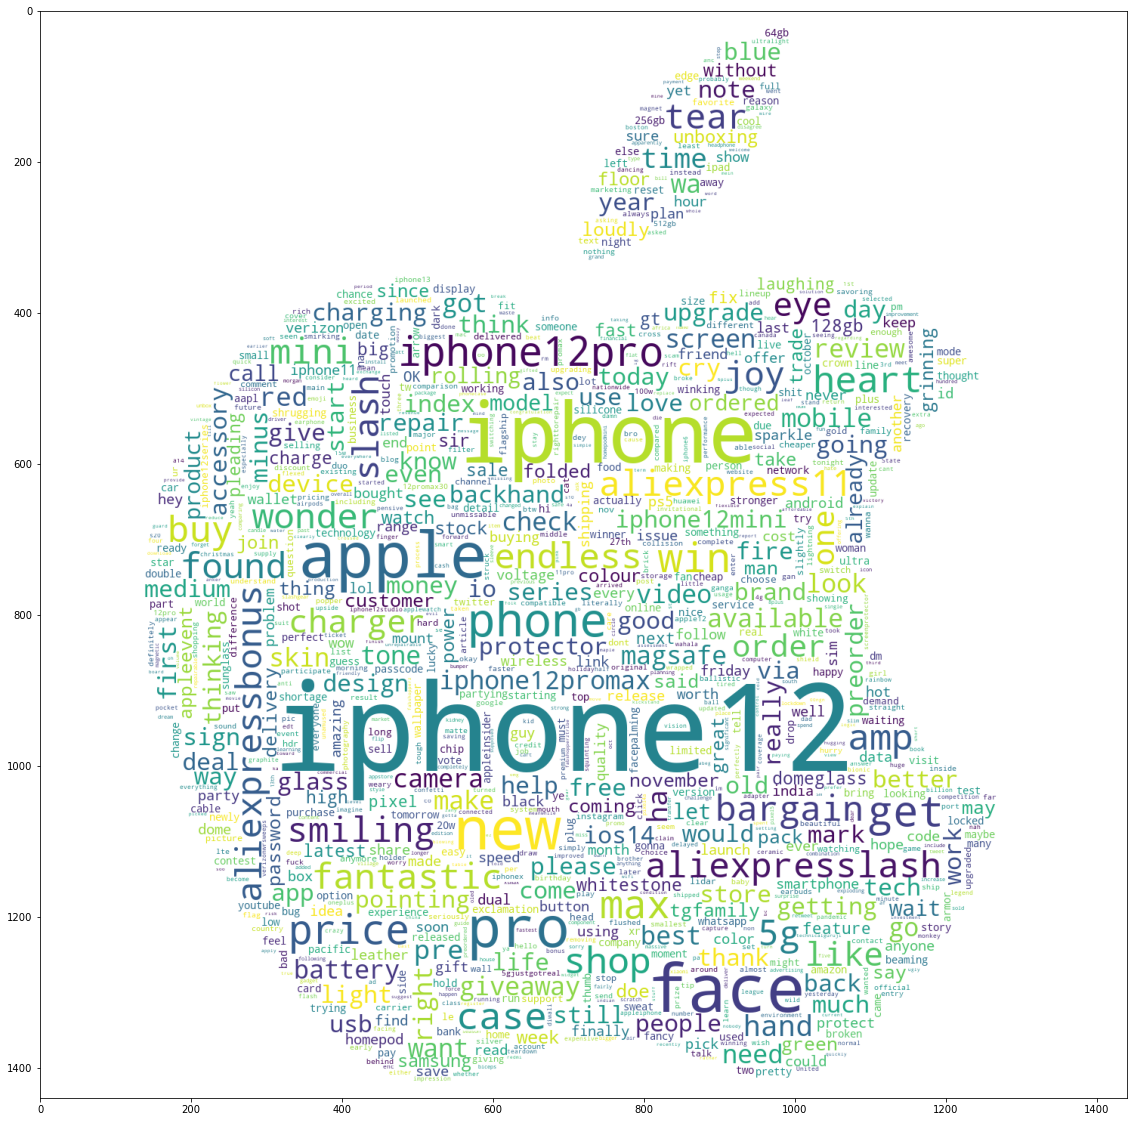

In [70]:
text1 = preprocess(text1)
stopword = stopwords.words("english")+['URL','USER']
mask = np.array(image.open("apple.png"))
plt.figure(figsize = (20,20))
wc1 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               stopwords=stopword,
               mask=mask,
               background_color='#FFFFFF',
               
               collocations=False).generate(" ".join(text1))


plt.imshow(wc1)
wc1.to_file("1st7day_wordcloud.jpg")

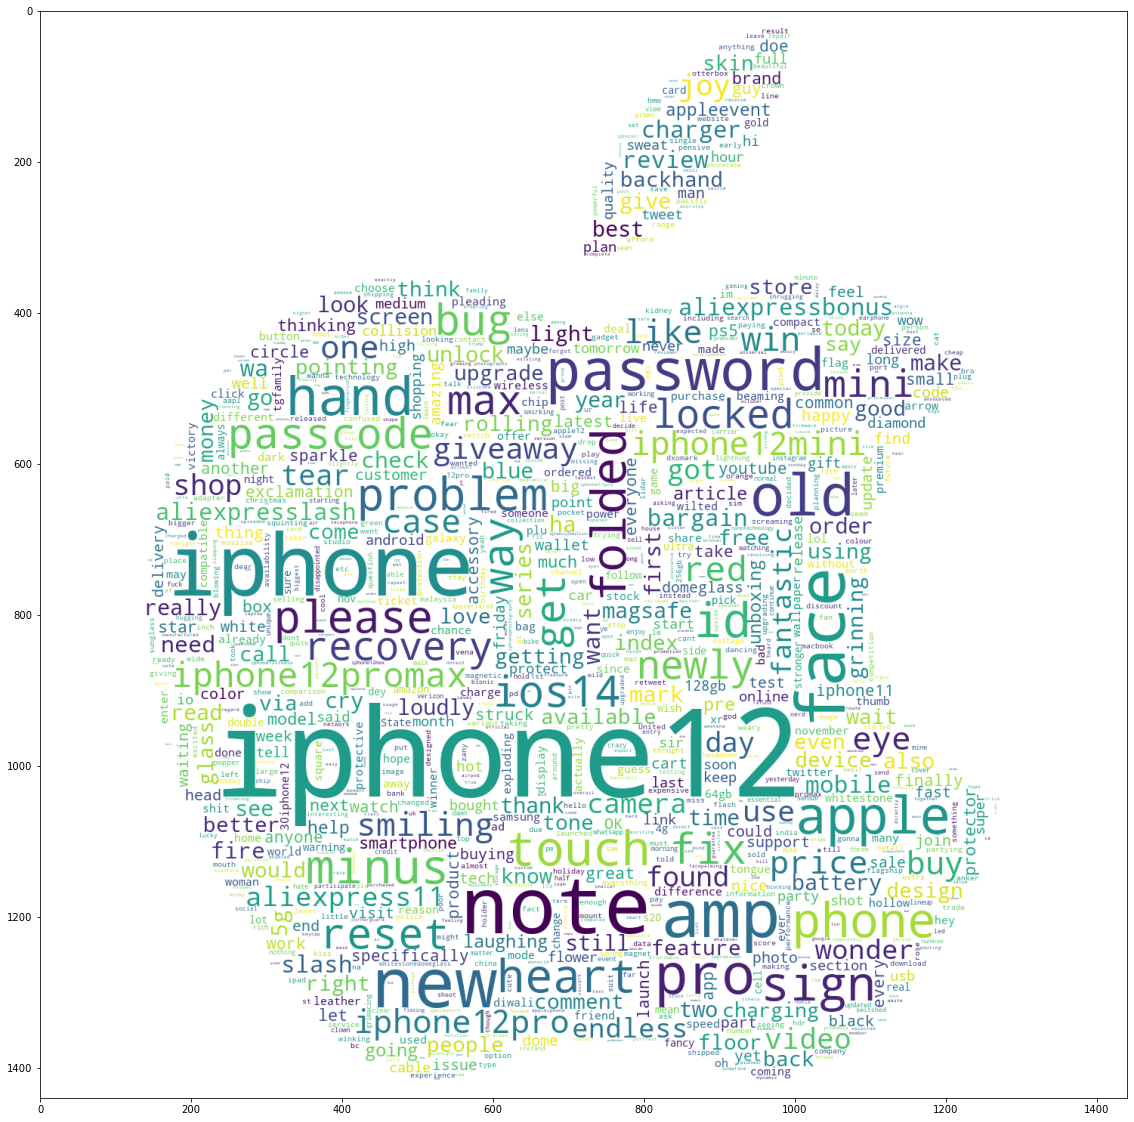

In [71]:
text2 = preprocess(text2)
stopword = stopwords.words("english")+['URL','USER']
mask = np.array(image.open("apple.png"))
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               stopwords=stopword,
               mask=mask,
               background_color='#FFFFFF',
               
               collocations=False).generate(" ".join(text2))
plt.imshow(wc2)
wc2.to_file("2nd7day_wordcloud.jpg")